#📌 Extracción

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [49]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [50]:
customer_df = pd.json_normalize(df['customer'])
df = df.join(customer_df)

In [51]:
phone_df = pd.json_normalize(df['phone'])
df = df.join(phone_df, rsuffix='_phone')

In [52]:
internet_df = pd.json_normalize(df['internet'])
df = df.join(internet_df, rsuffix='_internet')

In [53]:
account_df = pd.json_normalize(df['account'])
df = df.join(account_df, rsuffix='_account')

In [54]:
df.drop(['customerID','customer', 'phone','internet', 'account'], axis=1, inplace=True)

In [55]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'])

In [56]:
# 1 para 'Yes', 0 para 'No'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).fillna(-1).astype(int)

In [57]:
df['PaymentMethod'] = df['PaymentMethod'].astype(str).str.lower()
df['Contract'] = df['Contract'].astype(str).str.lower()
df['InternetService'] = df['InternetService'].astype(str).str.lower()

In [58]:
df['Contract'] = df['Contract'].str.replace('-', ' ')

In [59]:
df['Daily_Cost'] = (df['Charges.Monthly'] / 30).round(2)

In [60]:
df['DeviceProtection'] = df['DeviceProtection'].str.replace(' internet service', ' ')
df['TechSupport'] = df['TechSupport'].str.replace(' internet service', ' ')
df['StreamingTV'] = df['StreamingTV'].str.replace(' internet service', ' ')
df['StreamingMovies'] = df['StreamingMovies'].str.replace(' internet service', ' ')
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace(' internet service', ' ')

In [61]:
df.rename(columns={'SeniorCitizen': 'Senior', 'InternetService': 'Internet', 'PaperlessBilling': 'e-Billing'}, inplace=True)

In [62]:
MultipleLines_counts = df['MultipleLines'].value_counts()
MultipleLines_counts

,count
MultipleLines,
No,3495
Yes,3065
No phone service,707


In [63]:
df.sample(1)

,Churn,gender,Senior,Partner,Dependents,tenure,PhoneService,MultipleLines,Internet,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,e-Billing,PaymentMethod,Charges.Monthly,Charges.Total,Daily_Cost
5034,0,Male,0,No,No,1,Yes,No,dsl,Yes,...,No,No,No,No,month to month,Yes,mailed check,50.7,50.7,1.69


#📊 Carga y análisis

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   Senior            7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   Internet          7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  e-Billing         7267 non-null   object 


In [65]:
df[['Charges.Monthly', 'Charges.Total', 'Daily_Cost']].describe()

,Charges.Monthly,Charges.Total,Daily_Cost
count,7267.000000,7256.000000,7267.000000
mean,64.720098,2280.634213,2.157292
std,30.129572,2268.632997,1.004407
min,18.250000,18.800000,0.610000
25%,35.425000,400.225000,1.180000
50%,70.300000,1391.000000,2.340000
75%,89.875000,3785.300000,2.995000
max,118.750000,8684.800000,3.960000


In [66]:
# Contar la cantidad de clientes que se quedaron (0) y los que se fueron (1)
churn_counts = df['Churn'].value_counts()

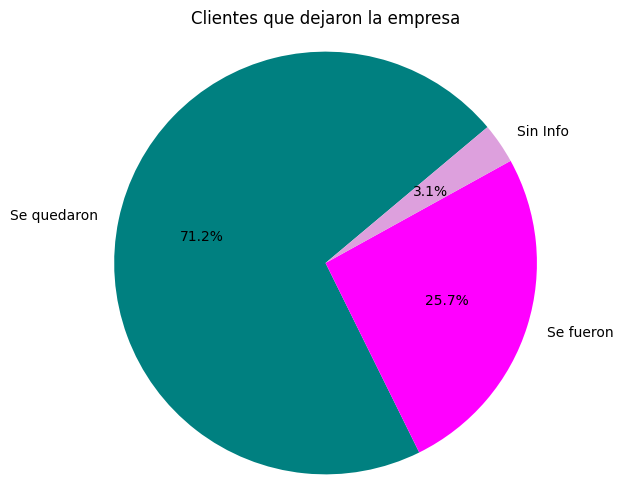

In [67]:
labels = ['Se quedaron', 'Se fueron', 'Sin Info']
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=40, colors=['teal', 'magenta', 'plum'])
plt.title('Clientes que dejaron la empresa')
plt.axis('equal')
plt.show()

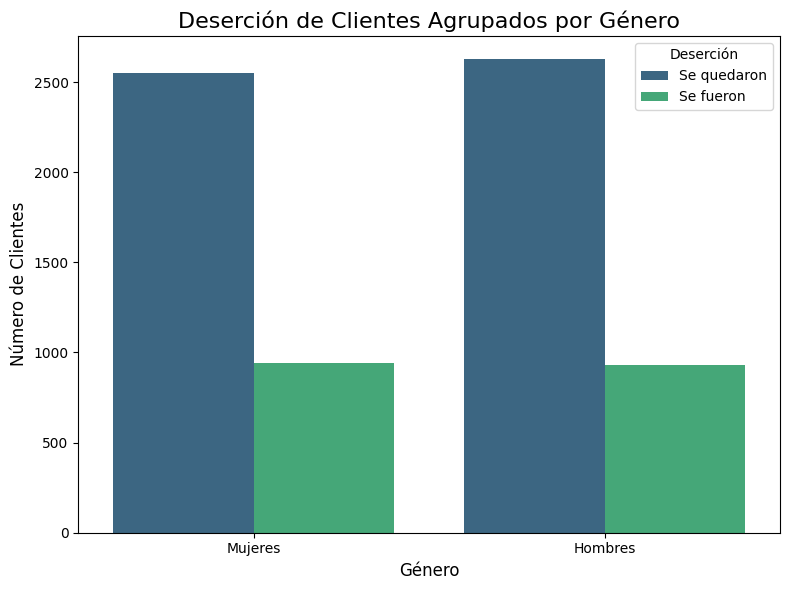

In [68]:
df_filtered = df[df['Churn'].isin([0, 1])].copy()
df_filtered['Churn_Label'] = df_filtered['Churn'].map({0: 'Se quedaron', 1: 'Se fueron'})
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='gender', hue='Churn_Label', palette='viridis')
current_labels = df_filtered['gender'].unique()
new_labels_map = {'Male': 'Hombres', 'Female': 'Mujeres'}
new_labels = [new_labels_map[label] for label in current_labels]
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)
plt.title('Deserción de Clientes Agrupados por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.legend(title='Deserción')
plt.tight_layout()
plt.show()


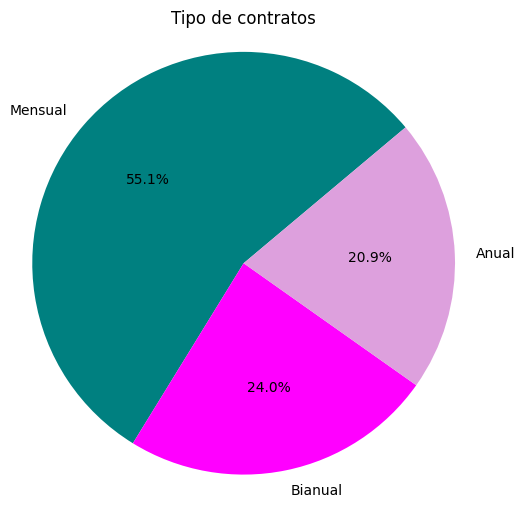

In [69]:
Contract_counts = df['Contract'].value_counts()
labels2 = ['Mensual', 'Bianual', 'Anual']
plt.figure(figsize=(6, 6))
plt.pie(Contract_counts, labels=labels2, autopct='%1.1f%%', startangle=40, colors=['teal', 'magenta', 'plum'])
plt.title('Tipo de contratos')
plt.axis('equal')
plt.show()

/tmp/ipython-input-70-1014574654.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Churn_Label', y='Charges.Total', palette='viridis')


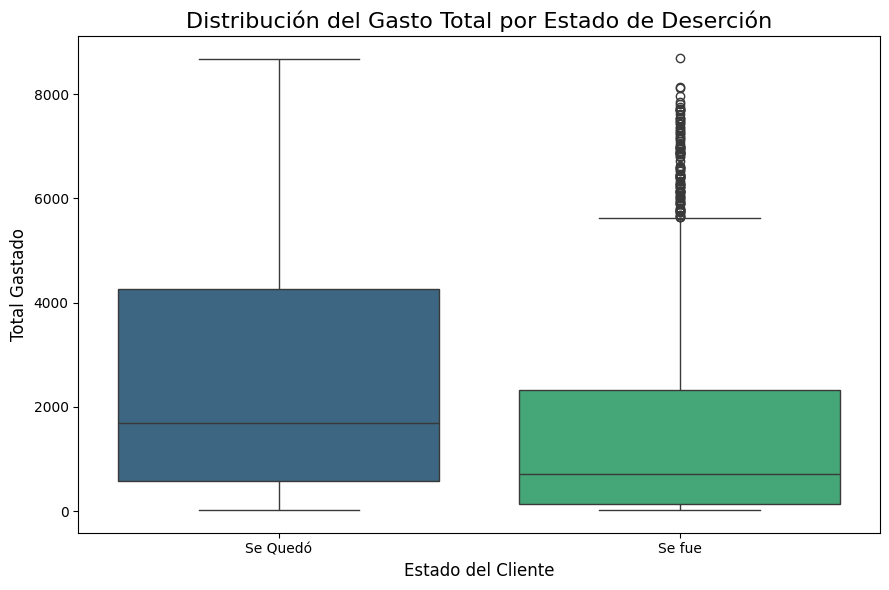

In [70]:
df_filtered = df[df['Churn'] != -1].copy()
df_filtered.dropna(subset=['Charges.Total'], inplace=True)

df_filtered['Churn_Label'] = df_filtered['Churn'].map({
    0: 'Se Quedó',
    1: 'Se fue'
})

plt.figure(figsize=(9, 6))
sns.boxplot(data=df_filtered, x='Churn_Label', y='Charges.Total', palette='viridis')

plt.title('Distribución del Gasto Total por Estado de Deserción', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Total Gastado', fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-71-1999145424.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='Churn_Label', y='tenure', palette='viridis') # Cambié la paleta a 'mako' para variar


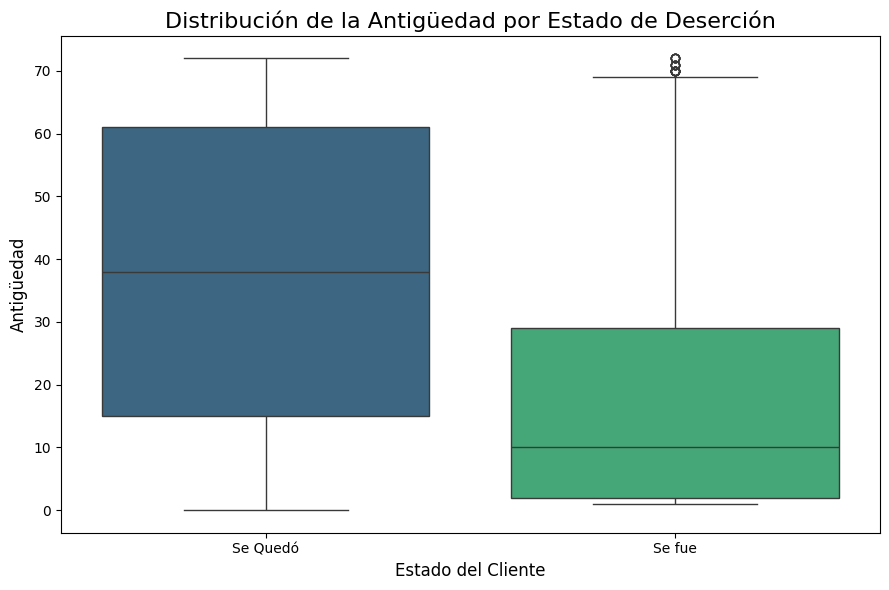

In [71]:
df_filtered2 = df[df['Churn'] != -1].copy()
df_filtered2.dropna(subset=['tenure'], inplace=True)

# Mapeamos los valores numéricos de 'Churn' a etiquetas descriptivas para el eje X.
df_filtered2['Churn_Label'] = df_filtered2['Churn'].map({
    0: 'Se Quedó',
    1: 'Se fue'
})

# --- Creación del Gráfico de Cajas para 'Tenure' ---
plt.figure(figsize=(9, 6))
# Usamos 'Churn_Label' en el eje X para las etiquetas descriptivas
# y 'Tenure' en el eje Y para la distribución de la antigüedad.
sns.boxplot(data=df_filtered2, x='Churn_Label', y='tenure', palette='viridis') # Cambié la paleta a 'mako' para variar

plt.title('Distribución de la Antigüedad por Estado de Deserción', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Antigüedad', fontsize=12) # Etiqueta del eje Y ajustada para 'Tenure'

plt.tight_layout()
plt.show()

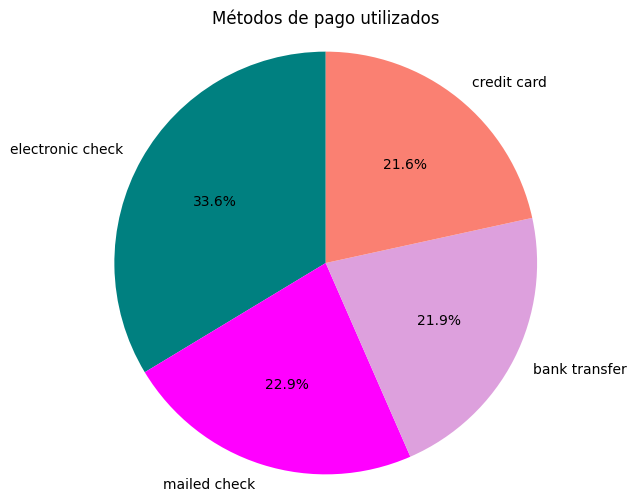

In [72]:
PaymentMethod_counts = df['PaymentMethod'].value_counts()
labels3 = ['electronic check', 'mailed check', 'bank transfer', 'credit card']
plt.figure(figsize=(6, 6))
plt.pie(PaymentMethod_counts, labels=labels3, autopct='%1.1f%%', startangle=90, colors=['teal', 'magenta', 'plum', 'salmon'])
plt.title('Métodos de pago utilizados')
plt.axis('equal')
plt.show()

--- Matriz de Correlación Numérica ---
Este es el coeficiente de correlación entre 'Churn' y 'Daily_Cost':

               Churn  Daily_Cost
Churn       1.000000    0.193412
Daily_Cost  0.193412    1.000000


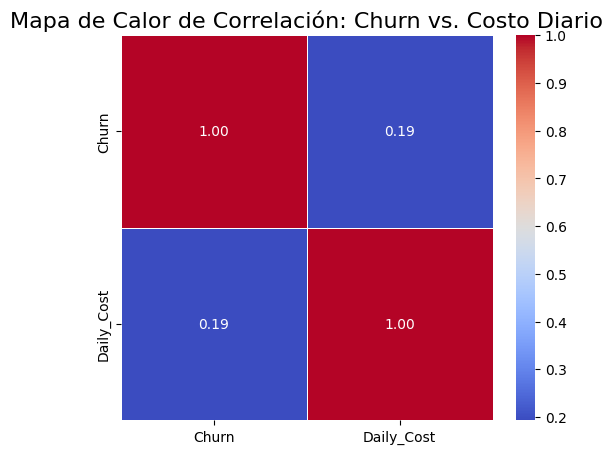


--- Interpretación ---
El coeficiente de correlación entre 'Churn' y 'Daily_Cost' es: 0.19
Esto indica una correlación débil o moderada. Existe una relación lineal limitada entre el costo diario y la deserción.

La visualización del mapa de calor complementa esto mostrando la fuerza de la relación con colores.


In [73]:
# --- Pasos para demostrar la correlación ---

# 1. Preparar los datos para la correlación
# Filtramos 'Churn' para solo 0 y 1, y eliminamos NaN en 'Daily_Cost'
df_filtered_corr = df[df['Churn'].isin([0, 1])].copy()
df_filtered_corr.dropna(subset=['Daily_Cost'], inplace=True)

# 2. Calcular la matriz de correlación (demostración numérica)
# Seleccionamos solo las columnas de interés y aplicamos .corr()
correlation_matrix = df_filtered_corr[['Churn', 'Daily_Cost']].corr()

print("--- Matriz de Correlación Numérica ---")
print("Este es el coeficiente de correlación entre 'Churn' y 'Daily_Cost':\n")
print(correlation_matrix)

# 3. Visualizar la correlación con un mapa de calor (demostración visual)
plt.figure(figsize=(6, 5)) # Tamaño del gráfico

sns.heatmap(
    correlation_matrix,
    annot=True,       # Muestra los valores de correlación en las celdas
    cmap='coolwarm',  # Paleta de colores: 'coolwarm' es buena para visualizar correlaciones
    fmt=".2f",        # Formato de los números a 2 decimales
    linewidths=.5,    # Líneas entre las celdas para mejor separación
    cbar=True         # Muestra la barra de color lateral para la escala
)

plt.title('Mapa de Calor de Correlación: Churn vs. Costo Diario', fontsize=16)
plt.show()

# --- Interpretación de la correlación (demostración de conclusiones) ---
correlation_value = correlation_matrix.loc['Churn', 'Daily_Cost']
print(f"\n--- Interpretación ---")
print(f"El coeficiente de correlación entre 'Churn' y 'Daily_Cost' es: {correlation_value:.2f}")

if correlation_value > 0.5:
    print("Esto indica una fuerte correlación positiva. A medida que el costo diario aumenta, la probabilidad de que un cliente deje la empresa tiende a aumentar.")
elif correlation_value < -0.5:
    print("Esto indica una fuerte correlación negativa. A medida que el costo diario aumenta, la probabilidad de que un cliente deje la empresa tiende a disminuir.")
elif correlation_value >= -0.5 and correlation_value <= 0.5 and correlation_value != 0:
    print("Esto indica una correlación débil o moderada. Existe una relación lineal limitada entre el costo diario y la deserción.")
elif correlation_value == 0:
    print("Esto indica que no hay una correlación lineal aparente entre el costo diario y la deserción.")

print("\nLa visualización del mapa de calor complementa esto mostrando la fuerza de la relación con colores.")

# **Inicio parte 2:**

In [74]:
print("Value counts for MultipleLines:")
print(df['MultipleLines'].value_counts())

print("\nValue counts for Internet:")
print(df['Internet'].value_counts())

print("\nValue counts for OnlineSecurity:")
print(df['OnlineSecurity'].value_counts())

print("\nValue counts for OnlineBackup:")
print(df['OnlineBackup'].value_counts())

print("\nValue counts for DeviceProtection:")
print(df['DeviceProtection'].value_counts())

print("\nValue counts for TechSupport:")
print(df['TechSupport'].value_counts())

print("\nValue counts for StreamingTV:")
print(df['StreamingTV'].value_counts())

print("\nValue counts for StreamingMovies:")
print(df['StreamingMovies'].value_counts())

Value counts for MultipleLines:
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Value counts for Internet:
Internet
fiber optic    3198
dsl            2488
no             1581
Name: count, dtype: int64

Value counts for OnlineSecurity:
OnlineSecurity
No     3608
Yes    2078
No     1581
Name: count, dtype: int64

Value counts for OnlineBackup:
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Value counts for DeviceProtection:
DeviceProtection
No     3195
Yes    2491
No     1581
Name: count, dtype: int64

Value counts for TechSupport:
TechSupport
No     3582
Yes    2104
No     1581
Name: count, dtype: int64

Value counts for StreamingTV:
StreamingTV
No     2896
Yes    2790
No     1581
Name: count, dtype: int64

Value counts for StreamingMovies:
StreamingMovies
No     2870
Yes    2816
No     1581
Name: count, dtype: int64


In [75]:
df_cleaned = df.copy()

# --- 1. Manejar valores nulos en 'Charges.Total' ---
print(f"Filas iniciales: {len(df_cleaned)}")

rows_with_nan_charges = df_cleaned[df_cleaned['Charges.Total'].isnull()]
print("\nFilas con NaN en 'Charges.Total' (antes de la eliminación):")
print(rows_with_nan_charges)

df_cleaned.dropna(subset=['Charges.Total'], inplace=True)
print(f"\nFilas después de eliminar NaN en 'Charges.Total': {len(df_cleaned)}")


# --- 2. Estandarizar valores "No Servicio" en columnas categóricas ---

# Columnas con 'No internet service'
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_service_cols:
    if 'No internet service' in df_cleaned[col].unique():
        df_cleaned[col] = df_cleaned[col].replace('No internet service', 'No')
        print(f"Reemplazado 'No internet service' por 'No' en la columna: {col}")

# Columna 'MultipleLines'
if 'No phone service' in df_cleaned['MultipleLines'].unique():
    df_cleaned['MultipleLines'] = df_cleaned['MultipleLines'].replace('No phone service', 'No')
    print("Reemplazado 'No phone service' por 'No' en la columna: MultipleLines")

# Columna 'InternetService' - Opcional: estandarizar 'no' a 'No'
if 'no' in df_cleaned['Internet'].unique():
    df_cleaned['Internet'] = df_cleaned['Internet'].replace('no', 'No')
    print("Estandarizado 'no' a 'No' en la columna: Internet")


# --- 3. Manejar valores -1 en 'Churn' ---
print(f"\nFilas con Churn -1 (antes del filtrado): {len(df_cleaned[df_cleaned['Churn'] == -1])}")
df_cleaned = df_cleaned[df_cleaned['Churn'] != -1].copy()
print(f"Filas después de filtrar Churn -1: {len(df_cleaned)}")


# --- Verificación Final de la Limpieza ---
print("\n--- Verificación Después de la Limpieza ---")
print("df_cleaned.info():")
df_cleaned.info()

print("\nValue counts for cleaned MultipleLines:")
print(df_cleaned['MultipleLines'].value_counts())

print("\nValue counts for cleaned Internet:")
print(df_cleaned['Internet'].value_counts())

print("\nValue counts for cleaned OnlineSecurity:")
print(df_cleaned['OnlineSecurity'].value_counts())


Filas iniciales: 7267

Filas con NaN en 'Charges.Total' (antes de la eliminación):
      Churn  gender  Senior Partner Dependents  tenure PhoneService  \
975       0  Female       0     Yes        Yes       0           No   
1775      0  Female       0     Yes        Yes       0          Yes   
1955      0    Male       0      No        Yes       0          Yes   
2075      0    Male       0     Yes        Yes       0          Yes   
2232      0    Male       0      No        Yes       0          Yes   
2308      0    Male       0     Yes        Yes       0          Yes   
2930      0  Female       0     Yes        Yes       0          Yes   
3134      0    Male       0     Yes        Yes       0          Yes   
3203      0  Female       0     Yes        Yes       0           No   
4169      0  Female       0     Yes        Yes       0          Yes   
5599      0    Male       0     Yes        Yes       0          Yes   

         MultipleLines Internet OnlineSecurity  ... DeviceProtec

In [76]:
print("Valores únicos en OnlineSecurity (después de limpieza parcial):")
print(df_cleaned['OnlineSecurity'].unique())

Valores únicos en OnlineSecurity (después de limpieza parcial):
['No' 'Yes' 'No ']


In [77]:
print("\n--- Limpieza Final: Eliminando espacios en blanco en columnas de tipo 'object' ---")
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].str.strip()
    print(f"Espacios eliminados en la columna: {col}")

# --- Verificación Final Después de TODA la Limpieza ---
print("\n--- Verificación Final Completa ---")
print("df_cleaned.info() después de limpieza completa:")
df_cleaned.info()

print("\nValue counts for cleaned MultipleLines (final):")
print(df_cleaned['MultipleLines'].value_counts())

print("\nValue counts for cleaned Internet (final):")
print(df_cleaned['Internet'].value_counts())

print("\nValue counts for cleaned OnlineSecurity (final):")
print(df_cleaned['OnlineSecurity'].value_counts())

print("\nValue counts for cleaned OnlineBackup (final):")
print(df_cleaned['OnlineBackup'].value_counts())


print("\nValue counts for cleaned DeviceProtection (final):")
print(df_cleaned['DeviceProtection'].value_counts())
print("\nValue counts for cleaned TechSupport (final):")
print(df_cleaned['TechSupport'].value_counts())
print("\nValue counts for cleaned StreamingTV (final):")
print(df_cleaned['StreamingTV'].value_counts())
print("\nValue counts for cleaned StreamingMovies (final):")
print(df_cleaned['StreamingMovies'].value_counts())


print("\nValores únicos en TODAS las columnas object (para revisión final):")
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"- {col}: {df_cleaned[col].unique()}")


--- Limpieza Final: Eliminando espacios en blanco en columnas de tipo 'object' ---
Espacios eliminados en la columna: gender
Espacios eliminados en la columna: Partner
Espacios eliminados en la columna: Dependents
Espacios eliminados en la columna: PhoneService
Espacios eliminados en la columna: MultipleLines
Espacios eliminados en la columna: Internet
Espacios eliminados en la columna: OnlineSecurity
Espacios eliminados en la columna: OnlineBackup
Espacios eliminados en la columna: DeviceProtection
Espacios eliminados en la columna: TechSupport
Espacios eliminados en la columna: StreamingTV
Espacios eliminados en la columna: StreamingMovies
Espacios eliminados en la columna: Contract
Espacios eliminados en la columna: e-Billing
Espacios eliminados en la columna: PaymentMethod

--- Verificación Final Completa ---
df_cleaned.info() después de limpieza completa:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            N

In [78]:
print("--- Inicio de la Codificación One-Hot Encoding ---")

# Identificar las columnas categóricas (tipo 'object') que necesitan codificación
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

print(f"\nColumnas categóricas a codificar: {categorical_cols}")

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True, dtype=int)

print("\n--- Verificación Después de One-Hot Encoding ---")
print("Primeras 5 filas del DataFrame codificado (df_encoded):")
print(df_encoded.head())

print("\nInformación del DataFrame codificado (df_encoded.info()):")
df_encoded.info()

print("\nForma del DataFrame codificado (filas, columnas):")
print(df_encoded.shape)

--- Inicio de la Codificación One-Hot Encoding ---

Columnas categóricas a codificar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Internet', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'e-Billing', 'PaymentMethod']

--- Verificación Después de One-Hot Encoding ---
Primeras 5 filas del DataFrame codificado (df_encoded):
   Churn  Senior  tenure  Charges.Monthly  Charges.Total  Daily_Cost  \
0      0       0       9             65.6         593.30        2.19   
1      0       0       9             59.9         542.40        2.00   
2      1       0       4             73.9         280.85        2.46   
3      1       1      13             98.0        1237.85        3.27   
4      1       1       3             83.9         267.40        2.80   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0            0            1               1                 1  ...   
1        

In [79]:
print("--- Inicio de la Ingeniería de Características ---")

df_encoded['Avg_Monthly_Charge_Per_Tenure'] = np.where(
    df_encoded['tenure'] == 0,
    df_encoded['Charges.Monthly'],
    df_encoded['Charges.Total'] / df_encoded['tenure']
)
print("Característica 'Avg_Monthly_Charge_Per_Tenure' creada.")

# 2. Crear 'Has_Multiple_Addons'
addon_cols = [
    'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
    'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'
]
df_encoded['Has_Multiple_Addons'] = df_encoded[addon_cols].sum(axis=1)
print("Característica 'Has_Multiple_Addons' creada.")


print("\n--- Verificación Después de Ingeniería de Características ---")
print("Primeras 5 filas del DataFrame con nuevas características:")
print(df_encoded.head())

print("\nEstadísticas descriptivas de las nuevas características:")
print(df_encoded[['Avg_Monthly_Charge_Per_Tenure', 'Has_Multiple_Addons']].describe())

print("\nForma del DataFrame final (filas, columnas):")
print(df_encoded.shape)

--- Inicio de la Ingeniería de Características ---
Característica 'Avg_Monthly_Charge_Per_Tenure' creada.
Característica 'Has_Multiple_Addons' creada.

--- Verificación Después de Ingeniería de Características ---
Primeras 5 filas del DataFrame con nuevas características:
   Churn  Senior  tenure  Charges.Monthly  Charges.Total  Daily_Cost  \
0      0       0       9             65.6         593.30        2.19   
1      0       0       9             59.9         542.40        2.00   
2      1       0       4             73.9         280.85        2.46   
3      1       1      13             98.0        1237.85        3.27   
4      1       1       3             83.9         267.40        2.80   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0            0            1               1                 1  ...   
1            1            0               0                 1  ...   
2            1            0               0                 1  ...   
3            1

In [80]:
from sklearn.preprocessing import StandardScaler

print("--- Inicio del Escalado de Características ---")

numerical_cols_to_scale = [
    'tenure',
    'Charges.Monthly',
    'Charges.Total',
    'Daily_Cost',
    'Avg_Monthly_Charge_Per_Tenure',
    'Has_Multiple_Addons'
]

print(f"\nColumnas numéricas a escalar: {numerical_cols_to_scale}")

scaler = StandardScaler()

df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
print("Escalado de características completado.")


print("\n--- Verificación Después de Escalado de Características ---")
print("Primeras 5 filas del DataFrame escalado (df_encoded):")
print(df_encoded.head())

print("\nEstadísticas descriptivas de las columnas escaladas (deberían tener media ~0, std ~1):")
print(df_encoded[numerical_cols_to_scale].describe())

print("\nForma final del DataFrame:")
print(df_encoded.shape)

--- Inicio del Escalado de Características ---

Columnas numéricas a escalar: ['tenure', 'Charges.Monthly', 'Charges.Total', 'Daily_Cost', 'Avg_Monthly_Charge_Per_Tenure', 'Has_Multiple_Addons']
Escalado de características completado.

--- Verificación Después de Escalado de Características ---
Primeras 5 filas del DataFrame escalado (df_encoded):
   Churn  Senior    tenure  Charges.Monthly  Charges.Total  Daily_Cost  \
0      0       0 -0.954296         0.026652      -0.745607    0.030023   
1      0       0 -0.954296        -0.162819      -0.768063   -0.159431   
2      1       0 -1.158016         0.302548      -0.883456    0.299246   
3      1       1 -0.791321         1.103642      -0.461240    1.106917   
4      1       1 -1.198760         0.634952      -0.889390    0.638269   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0            0            1               1                 1  ...   
1            1            0               0                 1  ..

--- Análisis de Correlación con 'Churn' ---

Correlación de las características con 'Churn' (ordenado por valor absoluto):
Churn                                    1.000000
tenure                                  -0.354049
Internet_fiber optic                     0.307463
Contract_two year                       -0.301552
PaymentMethod_electronic check           0.301455
Charges.Total                           -0.199484
Daily_Cost                               0.192914
Charges.Monthly                          0.192858
Avg_Monthly_Charge_Per_Tenure            0.192033
e-Billing_Yes                            0.191454
Contract_one year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Senior                                   0.150541
Partner_Yes                             -0.149982
PaymentMethod_credit card (automatic)   -0.134687
Internet_dsl               

/tmp/ipython-input-81-456271025.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strongest_correlations.values, y=strongest_correlations.index, palette='viridis')


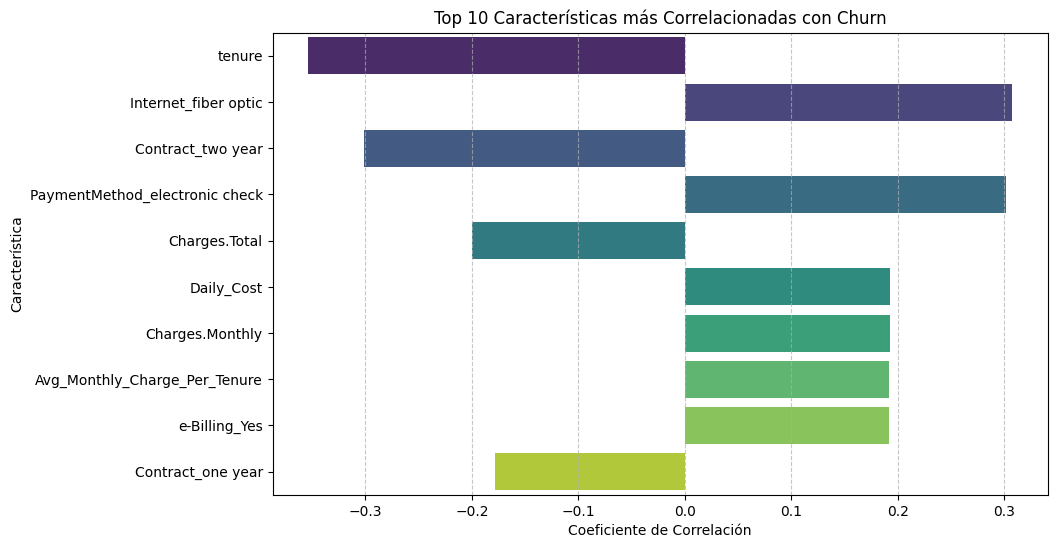

In [81]:
print("--- Análisis de Correlación con 'Churn' ---")

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False, key=abs)

print("\nCorrelación de las características con 'Churn' (ordenado por valor absoluto):")
print(churn_correlations)

# Excluir 'Churn' de la lista para la visualización
churn_correlations_filtered = churn_correlations.drop('Churn')


top_n_features = 10
strongest_correlations = churn_correlations_filtered.head(top_n_features)

plt.figure(figsize=(10, 6))
sns.barplot(x=strongest_correlations.values, y=strongest_correlations.index, palette='viridis')
plt.title(f'Top {top_n_features} Características más Correlacionadas con Churn')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

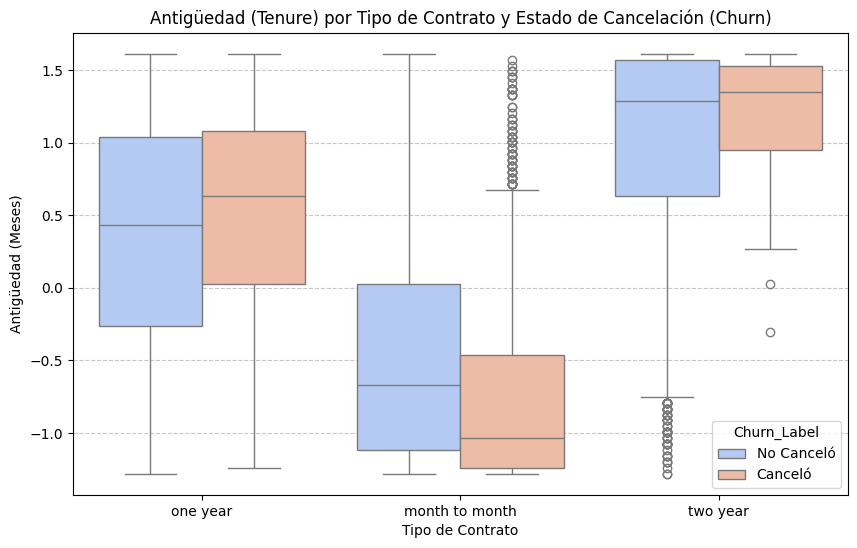

/tmp/ipython-input-82-3892218911.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn_Label', y='Charges.Total', palette='viridis')


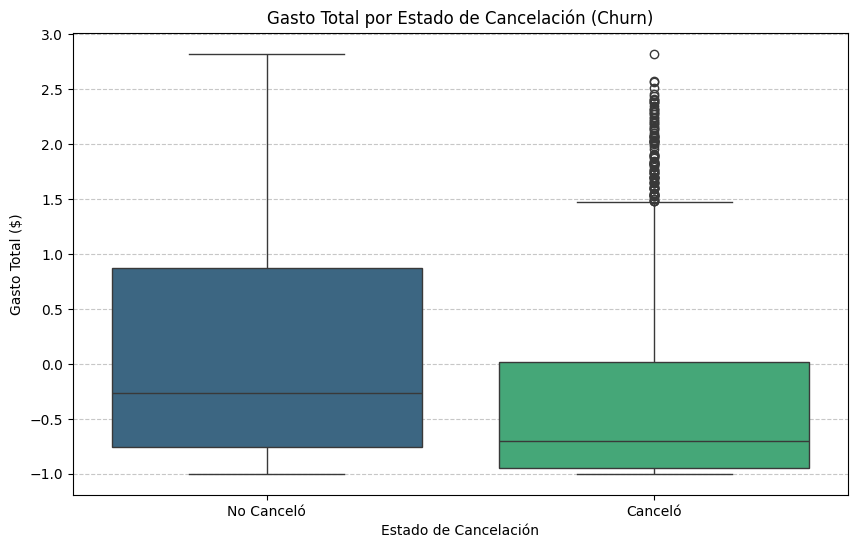

In [82]:
df_plot = df_encoded.copy()
df_plot['Churn_Label'] = df_plot['Churn'].map({0: 'No Canceló', 1: 'Canceló'})

conditions = [
    (df_plot['Contract_one year'] == 1),
    (df_plot['Contract_two year'] == 1)
]
choices = ['one year', 'two year']
df_plot['Contract_Original'] = np.select(conditions, choices, default='month to month')


# --- BOXPLOT 1: Tiempo de Contrato vs. Cancelación (Churn) ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='Contract_Original', y='tenure', hue='Churn_Label', palette='coolwarm')
plt.title('Antigüedad (Tenure) por Tipo de Contrato y Estado de Cancelación (Churn)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Antigüedad (Meses)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- BOXPLOT 2: Gasto Total vs. Cancelación (Churn) ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot, x='Churn_Label', y='Charges.Total', palette='viridis')
plt.title('Gasto Total por Estado de Cancelación (Churn)')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Gasto Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [83]:
from sklearn.model_selection import train_test_split

print("--- Inicio de la División de Datos (Train-Test Split) ---")

# 1. Definir las características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1) # Todas las columnas excepto 'Churn'
y = df_encoded['Churn']             # La columna 'Churn'

print(f"\nForma de X (Características): {X.shape}")
print(f"Forma de y (Variable Objetivo): {y.shape}")

# Verificar el balance de la clase Churn antes de la división (importante para stratify)
print("\nBalance de la variable 'Churn' antes de la división:")
print(y.value_counts(normalize=True))


# 2. Realizar la división Train-Test Split
# test_size=0.30 para 70% entrenamiento, 30% prueba
# random_state para reproducibilidad
# stratify=y para mantener la proporción de Churn en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("\n--- Verificación Después de la División ---")
print(f"Forma de X_train (Entrenamiento - Características): {X_train.shape}")
print(f"Forma de X_test (Prueba - Características): {X_test.shape}")
print(f"Forma de y_train (Entrenamiento - Objetivo): {y_train.shape}")
print(f"Forma de y_test (Prueba - Objetivo): {y_test.shape}")

# Verificar el balance de la clase Churn después de la división en los sets de entrenamiento y prueba
print("\nBalance de la variable 'Churn' en y_train:")
print(y_train.value_counts(normalize=True))

print("\nBalance de la variable 'Churn' en y_test:")
print(y_test.value_counts(normalize=True))

print("\nDivisión de datos completada exitosamente. ¡Estamos listos para el Modelado Predictivo!")

--- Inicio de la División de Datos (Train-Test Split) ---

Forma de X (Características): (7032, 26)
Forma de y (Variable Objetivo): (7032,)

Balance de la variable 'Churn' antes de la división:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

--- Verificación Después de la División ---
Forma de X_train (Entrenamiento - Características): (4922, 26)
Forma de X_test (Prueba - Características): (2110, 26)
Forma de y_train (Entrenamiento - Objetivo): (4922,)
Forma de y_test (Prueba - Objetivo): (2110,)

Balance de la variable 'Churn' en y_train:
Churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Balance de la variable 'Churn' en y_test:
Churn
0    0.734123
1    0.265877
Name: proportion, dtype: float64

División de datos completada exitosamente. ¡Estamos listos para el Modelado Predictivo!


In [84]:
from sklearn.model_selection import train_test_split # Asegúrate de que X_train, X_test, y_train, y_test estén definidos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


print("--- Inicio del Modelado Predictivo y Evaluación ---")

# Diccionario para almacenar los resultados de cada modelo
model_results = {}

# Lista de modelos a probar
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}

for model_name, model in models.items():
    print(f"\n--- Entrenando y evaluando: {model_name} ---")

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular probabilidades para ROC AUC (si aplica)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = "N/A"

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Almacenar resultados
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    }

    # Imprimir reporte de clasificación completo
    print(f"Reporte de Clasificación para {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc}")

print("\n--- Resumen Comparativo de Modelos ---")
results_df = pd.DataFrame.from_dict(model_results, orient='index')
print(results_df)

--- Inicio del Modelado Predictivo y Evaluación ---

--- Entrenando y evaluando: Logistic Regression ---
Reporte de Clasificación para Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

ROC AUC Score: 0.8453708850169566

--- Entrenando y evaluando: Decision Tree ---
Reporte de Clasificación para Decision Tree:

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1549
           1       0.46      0.46      0.46       561

    accuracy                           0.71      2110
   macro avg       0.63      0.63      0.63      2110
weighted avg       0.71      0.71      0.71      2110

ROC AUC Score: 0.6336547413143319

--- Entrenando y evaluando:

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report
import time
print("--- Inicio de la Optimización de Hiperparámetros con GridSearchCV ---")

# --- 1. Optimización para Regresión Logística ---
print("\nOptimizando Regresión Logística...")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
start_time_lr = time.time()
grid_search_lr.fit(X_train, y_train)
end_time_lr = time.time()

print(f"Tiempo de ejecución para Regresión Logística: {end_time_lr - start_time_lr:.2f} segundos")
print("Mejores hiperparámetros para Regresión Logística:", grid_search_lr.best_params_)
print("Mejor ROC AUC en validación cruzada para Regresión Logística:", grid_search_lr.best_score_)

# Evaluar el mejor modelo de Regresión Logística en el conjunto de prueba
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
y_pred_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]
print(f"ROC AUC en conjunto de prueba para Regresión Logística (Optimizada): {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("Reporte de Clasificación para Regresión Logística (Optimizada):\n", classification_report(y_test, y_pred_lr))

# --- 2. Optimización para Gradient Boosting ---
print("\nOptimizando Gradient Boosting...")
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
start_time_gb = time.time()
grid_search_gb.fit(X_train, y_train)
end_time_gb = time.time()

print(f"Tiempo de ejecución para Gradient Boosting: {end_time_gb - start_time_gb:.2f} segundos")
print("Mejores hiperparámetros para Gradient Boosting:", grid_search_gb.best_params_)
print("Mejor ROC AUC en validación cruzada para Gradient Boosting:", grid_search_gb.best_score_)

# Evaluar el mejor modelo de Gradient Boosting en el conjunto de prueba
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
y_pred_proba_gb = best_gb_model.predict_proba(X_test)[:, 1]
print(f"ROC AUC en conjunto de prueba para Gradient Boosting (Optimizada): {roc_auc_score(y_test, y_pred_proba_gb):.4f}")
print("Reporte de Clasificación para Gradient Boosting (Optimizada):\n", classification_report(y_test, y_pred_gb))

print("\n--- Optimización de Hiperparámetros Completada ---")

--- Inicio de la Optimización de Hiperparámetros con GridSearchCV ---

Optimizando Regresión Logística...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tiempo de ejecución para Regresión Logística: 15.63 segundos
Mejores hiperparámetros para Regresión Logística: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor ROC AUC en validación cruzada para Regresión Logística: 0.843325131640059
ROC AUC en conjunto de prueba para Regresión Logística (Optimizada): 0.8454
Reporte de Clasificación para Regresión Logística (Optimizada):
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110


Optimizando Gradient Boosting...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tiempo de ejecución para Gra

--- Análisis de Relevancia de Variables ---

--- Coeficientes de Regresión Logística (Modelo Optimizado) ---
                 Feature  Coefficient  Abs_Coefficient
11  Internet_fiber optic     2.624235         2.624235
1                 tenure    -1.400628         1.400628
10          Internet_dsl     1.319442         1.319442
19     Contract_two year    -1.270331         1.270331
2        Charges.Monthly    -0.791453         0.791453
18     Contract_one year    -0.701775         0.701775
3          Charges.Total     0.689329         0.689329
15       TechSupport_Yes    -0.607366         0.607366
25   Has_Multiple_Addons     0.550561         0.550561
12    OnlineSecurity_Yes    -0.490359         0.490359

Nota: Un coeficiente positivo indica una mayor probabilidad de Churn; negativo, menor probabilidad.


/tmp/ipython-input-86-2590199631.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=lr_feature_importance.head(15), palette='coolwarm')


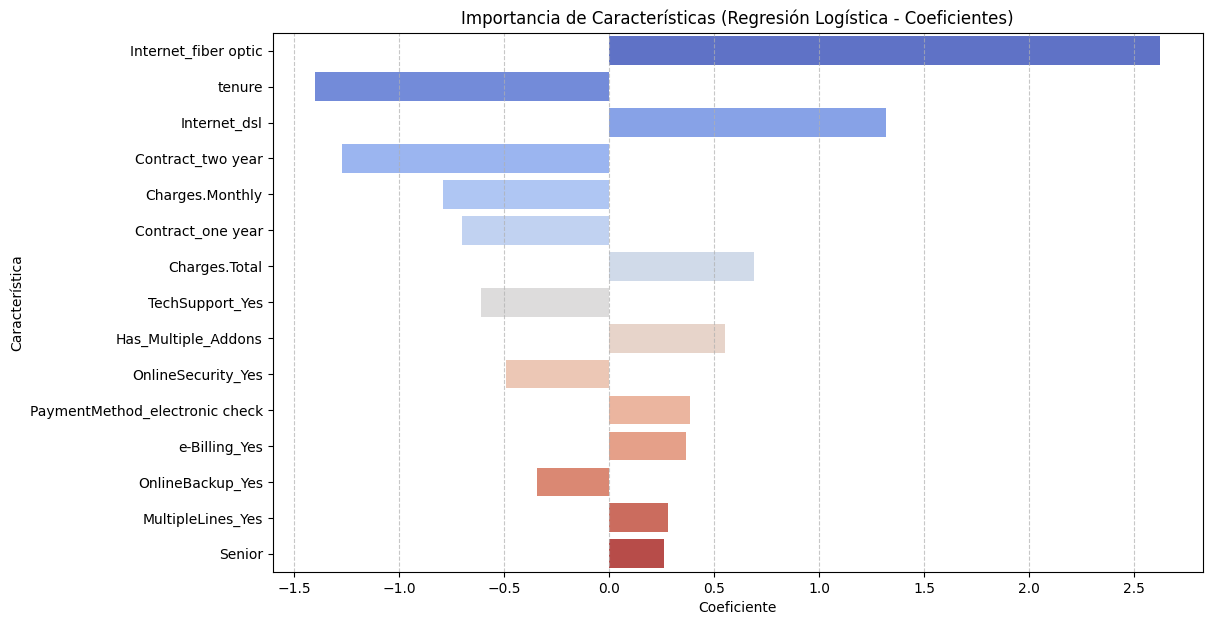


--- Importancia de Características (Random Forest) ---
                           Feature  Importance
3                    Charges.Total    0.149419
1                           tenure    0.137864
24   Avg_Monthly_Charge_Per_Tenure    0.118726
2                  Charges.Monthly    0.117708
4                       Daily_Cost    0.094435
11            Internet_fiber optic    0.040861
22  PaymentMethod_electronic check    0.039153
19               Contract_two year    0.027764
25             Has_Multiple_Addons    0.027108
20                   e-Billing_Yes    0.022047


/tmp/ipython-input-86-2590199631.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(15), palette='viridis')


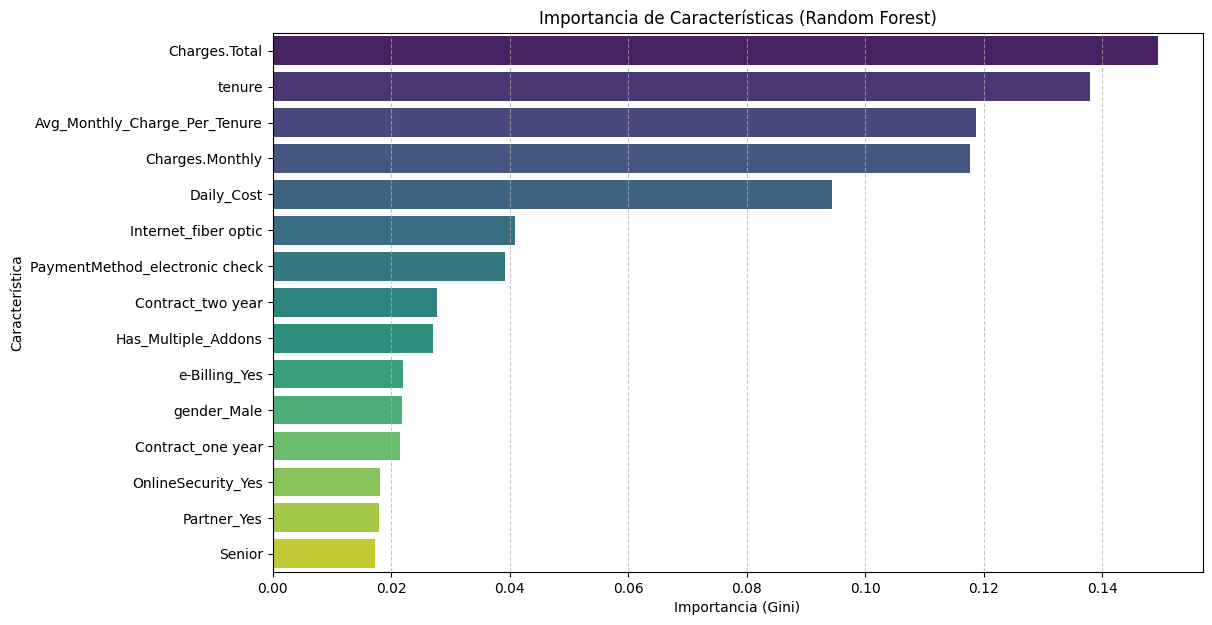


--- Importancia de Características (Gradient Boosting - Modelo Optimizado) ---
                           Feature  Importance
1                           tenure    0.316758
11            Internet_fiber optic    0.198840
22  PaymentMethod_electronic check    0.114420
3                    Charges.Total    0.071201
24   Avg_Monthly_Charge_Per_Tenure    0.060823
19               Contract_two year    0.043531
18               Contract_one year    0.037639
2                  Charges.Monthly    0.032923
20                   e-Billing_Yes    0.018808
15                 TechSupport_Yes    0.018166


/tmp/ipython-input-86-2590199631.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(15), palette='mako')


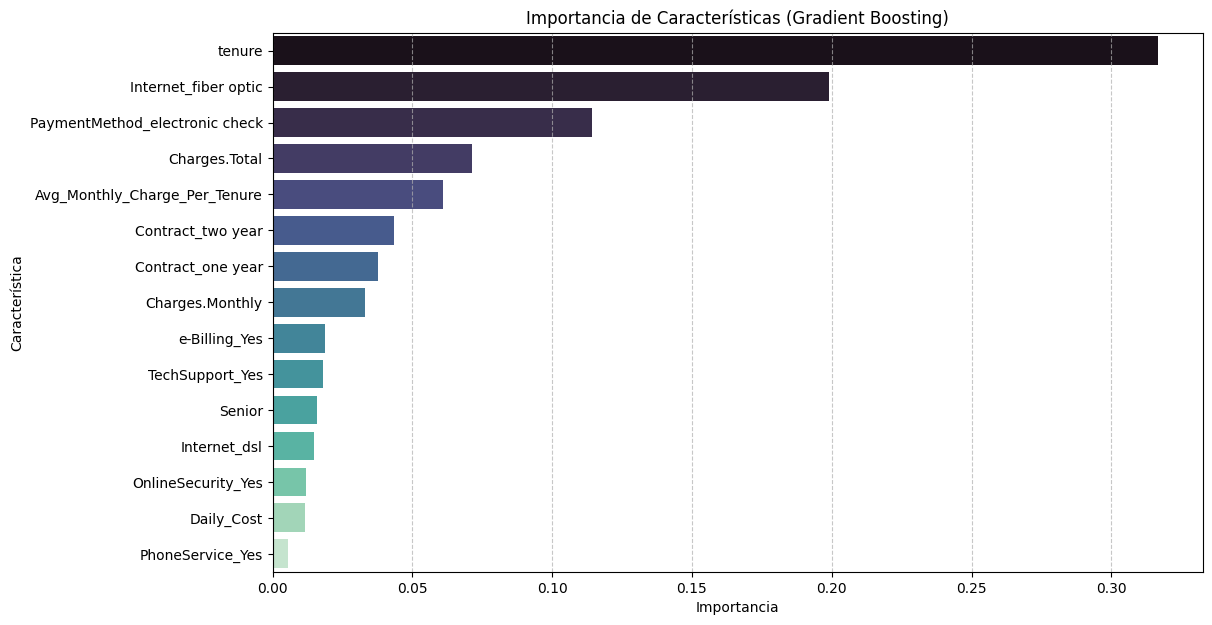

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV # Para usar los best_estimators si el entorno se reinició

# Para Regresión Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_

# Para Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

# Para Random Forest (usaremos el modelo base entrenado previamente, o lo re-entrenamos si es necesario)
# Si no lo tienes en memoria, lo re-entrenamos con parámetros por defecto
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


print("--- Análisis de Relevancia de Variables ---")

# --- 1. Regresión Logística: Coeficientes ---
print("\n--- Coeficientes de Regresión Logística (Modelo Optimizado) ---")

feature_names = X_train.columns
coefficients = best_lr_model.coef_[0]

lr_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
lr_feature_importance['Abs_Coefficient'] = np.abs(lr_feature_importance['Coefficient'])
lr_feature_importance = lr_feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(lr_feature_importance.head(10)) # Mostrar las 10 características más importantes
print("\nNota: Un coeficiente positivo indica una mayor probabilidad de Churn; negativo, menor probabilidad.")

# Visualización de los coeficientes de Regresión Logística
plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=lr_feature_importance.head(15), palette='coolwarm')
plt.title('Importancia de Características (Regresión Logística - Coeficientes)')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# --- 2. Random Forest: Importancia de Características ---
print("\n--- Importancia de Características (Random Forest) ---")
# La importancia de características en Random Forest se calcula como la reducción promedio en la impureza
# (como la impureza de Gini) que cada característica aporta a través de todos los árboles del bosque.

rf_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

print(rf_feature_importance.head(10)) # Mostrar las 10 características más importantes

# Visualización de la importancia de Random Forest
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(15), palette='viridis')
plt.title('Importancia de Características (Random Forest)')
plt.xlabel('Importancia (Gini)')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# --- 3. Gradient Boosting: Importancia de Características ---
print("\n--- Importancia de Características (Gradient Boosting - Modelo Optimizado) ---")


gb_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': best_gb_model.feature_importances_})
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

print(gb_feature_importance.head(10)) # Mostrar las 10 características más importantes

# Visualización de la importancia de Gradient Boosting
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(15), palette='mako')
plt.title('Importancia de Características (Gradient Boosting)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#📄Informe final

# **Informe último challenge**

# **I.- Introducción**

### Este informe es la continuacion de la parte 1 del challenge. Esta sección busca generar modelos para la predicción de "Churn", para ello se procedió con distintos métodos, generando 5 modelos que finalmente se comparan entre si, además de destacar las acaracterísticas más influyentes para la predicción y toma de decisiones.

# **II.- Desarrollo**

##1. Preparación de Datos:
*   Limpieza: Se trataron datos faltantes, inconsistencias y se unificaron formatos de texto.
*   Creación de nuevas variables: Se crearon nuevas variables (Daily_Cost, Avg_Monthly_Charge_Per_Tenure, Has_Multiple_Addons) para enriquecer el dataset.
*   Transformación: Las variables categóricas se convirtieron a formato numérico (One-Hot Encoding) y las numéricas se escalaron (StandardScaler) para optimizar el aprendizaje del modelo.


##2. Análisis de Correlación:

###Se identificaron las variables con mayor influencia en el Churn. Destacan:
*   Antigüedad (tenure): Menor antigüedad, mayor riesgo de churn.
*   Internet Fibra Óptica (Internet_fiber optic): Asociado a mayor probabilidad de churn.
*   Contrato de Dos Años (Contract_two year): Fuerte factor de retención.
*   Método de Pago "Cheque Electrónico" (PaymentMethod_electronic check): Vinculado a mayor riesgo de churn.

##3. Modelado y Optimización:

*   El dataset se dividió en conjuntos de entrenamiento (70%) y prueba (30%),
asegurando un balance de clases.
*   Se evaluaron cinco modelos predictivos (Regresión Logística, Árbol de Decisión, Random Forest, Gradient Boosting, SVM).
*   Se realizó una optimización de hiperparámetros (GridSearchCV) para los modelos de mejor desempeño inicial (Regresión Logística y Gradient Boosting).
*   Modelo Final Seleccionado: La Regresión Logística Optimizada fue elegida por su excelente rendimiento general (ROC AUC de 0.8454), superior Recall (0.54) para la clase "Churn", y su alta interpretabilidad.

##4. Variables Clave para la Toma de Decisiones:

###Los factores más influyentes en el churn, derivados del modelo final, son cruciales para estrategias de retención:
*   Clientes Nuevos (tenure baja): Son el grupo de mayor riesgo. Acción: Intervención temprana con programas de bienvenida y seguimiento.
*   Servicio de Fibra Óptica: Clientes con este servicio tienden más a cancelar. Acción: Investigar satisfacción, posibles problemas o competitividad en precios/calidad de la fibra.
*   Contratos de Dos Años: Actúan como un fuerte ancla de retención. Acción: Promocionar activamente la migración a contratos de mayor duración.
*   Método de Pago "Cheque Electrónico": Indica mayor propensión al churn. Acción: Analizar la experiencia del cliente con este método e incentivar otros.

# III.- Conclusión:

###El proyecto logró identificar los factores clave del Churn y desarrollar un modelo predictivo. Tras la preparación de datos y el análisis de correlación (Antigüedad, Fibra Óptica, Contratos a 2 años y Pago Electrónico son cruciales), se evaluaron múltiples modelos.
###Rendimiento de Modelos Optimizados (ROC AUC):
###Regresión Logística: 0.8454
###Gradient Boosting: 0.8450
###La Regresión Logística fue seleccionada como el mejor modelo; su fortaleza radica en su interpretabilidad (coeficientes claros para acción directa) y su balance (Recall de 0.54) en la detección de Churn. Aunque Gradient Boosting ofrece un rendimiento comparable, su menor interpretabilidad es una debilidad si el entendimiento del "porqué" es prioritario.


